In [73]:
print (" Om Gam Ganapataye Namah")

 Om Gam Ganapataye Namah


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
nift = pd.read_csv("D:/stu/nifty_ts.csv",sep=',')

In [30]:
nift.head(3)

,Date,Prices,Returns
0,1-Jan-03,1100.15,0.006063
1,2-Jan-03,1093.05,-0.006475
2,3-Jan-03,1089.60,-0.003161


In [31]:
nift.set_index('Date',inplace=True)

In [32]:
nift.dtypes
nift.columns

Index(['Prices', 'Returns'], dtype='object')

In [76]:
rolling_mean = nift['Prices'].rolling(window = 12).mean()
rolling_std = nift['Prices'].rolling(window = 12).std()


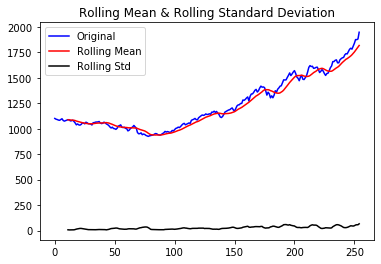

In [77]:
plt.plot(nift["Prices"], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

##  the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

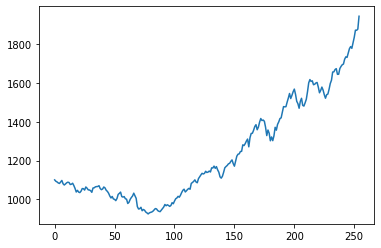

In [78]:
plt.plot(nift['Prices'])

In [79]:
from statsmodels.tsa.stattools import adfuller
dfout =adfuller(nift['Prices'],autolag='AIC')
dfoutput = pd.Series(dfout[0:4], index=['Test Statistic','P-Value', '#Lags used', '# of observations used'])
print(dfoutput)
print(type(dfout))


Test Statistic              2.577859
P-Value                     0.999071
#Lags used                  1.000000
# of observations used    253.000000
dtype: float64
<class 'tuple'>


In [13]:
for key, value in dfout[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

Test Statistic              2.577859
P-Value                     0.999071
#Lags used                  1.000000
# of observations used    253.000000
Critical Value (1%)        -3.456464
dtype: float64
Test Statistic              2.577859
P-Value                     0.999071
#Lags used                  1.000000
# of observations used    253.000000
Critical Value (1%)        -3.456464
Critical Value (5%)        -2.873033
dtype: float64
Test Statistic              2.577859
P-Value                     0.999071
#Lags used                  1.000000
# of observations used    253.000000
Critical Value (1%)        -3.456464
Critical Value (5%)        -2.873033
Critical Value (10%)       -2.572895
dtype: float64


In [80]:
training_percentage = 0.7
train_size = int(len(nift) * training_percentage)
train, test = nift[:train_size], nift[train_size:]

In [81]:
train['dPrices'] = train.Prices.diff()
test['tPrices'] = test.Prices.diff()
train.dPrices.dropna(how='any',inplace=True)
test.tPrices.dropna(how='any',inplace=True)

In [82]:
from statsmodels.tsa.arima_model import ARIMA
#model = ARIMA(nift.Prices,order=(1,1,0))
model = ARIMA(train['Prices'],order=(1,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
##pred=model.predict(tPrices)
#model_fit = model.fit(disp=1)
#fc, se, confint = model_fit.forecast(12, alpha=0.05)  # 95% conf
#res_model

                             ARIMA Model Results                              
Dep. Variable:               D.Prices   No. Observations:                  177
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -703.500
Method:                       css-mle   S.D. of innovations             12.878
Date:                Sun, 28 Jun 2020   AIC                           1412.999
Time:                        13:31:47   BIC                           1422.528
Sample:                             1   HQIC                          1416.864
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2308      1.175      1.048      0.295      -1.071       3.533
ar.L1.D.Prices     0.1766      0.076      2.311      0.021       0.027       0.326
                                    

In [83]:
model = ARIMA(train['dPrices'],order=(0,2,1))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D2.dPrices   No. Observations:                  175
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -742.853
Method:                       css-mle   S.D. of innovations             16.629
Date:                Sun, 28 Jun 2020   AIC                           1491.706
Time:                        13:31:51   BIC                           1501.200
Sample:                             2   HQIC                          1495.557
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0102      0.025     -0.415      0.678      -0.059       0.038
ma.L1.D2.dPrices    -1.0000      0.014    -69.772      0.000      -1.028      -0.972
                            

In [84]:
# Forecast
fc, se, confidence = model_fit.forecast(alpha=0.05)  

In [135]:
fc = pd.DataFrame(fc)

In [152]:
fc

array([1322.69549229])

In [100]:
# Accuracy metrics
fc = list(fc)

#root mean sqaure error 
rmse = np.mean((fc - test.Prices)**2)**.5  

#mean absolute error
mae = np.mean(np.abs(fc - test.Prices)) 
mape = np.mean(np.abs(fc - test.Prices)/np.abs(test.Prices))  # MAPE
print('rmse:',rmse)
print('mae:',mae)
print('mape:',mape)

rmse: 1626.2481110334163
mae: 1619.95749593538
mape: 1.0280806227713963


In [79]:
rmse

20.79153515116681

In [69]:
print(tPrices.shape)
dPrices.shape

(76,)


(177,)

In [64]:
train.shape
test.shape

(77, 3)

In [65]:
pred.shape

(176,)

In [36]:
fc[0]

43.78540377180929

In [77]:
se

array([16.22742098, 25.18293739, 32.04907322, 37.73997342, 42.68787609,
       47.12059969, 51.17103197, 54.92361273, 58.43571609, 61.74838276,
       64.89216182, 67.89051895])

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Prices   No. Observations:                  253
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1107.976
Method:                       css-mle   S.D. of innovations             19.300
Date:                Sun, 28 Jun 2020   AIC                           2221.953
Time:                        11:06:58   BIC                           2232.553
Sample:                             1   HQIC                          2226.218
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2213      0.879      0.252      0.801      -1.502       1.945
ar.L1.D.Prices    -0.3816      0.059     -6.464      0.000      -0.497      -0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6205           +0.0000j            2.6205            0.5000
-----------------------------------------------------------------------------
"""

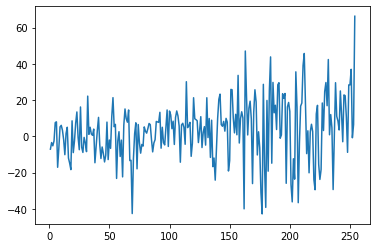

In [12]:
#dPrices
plt.plot(dPrices)

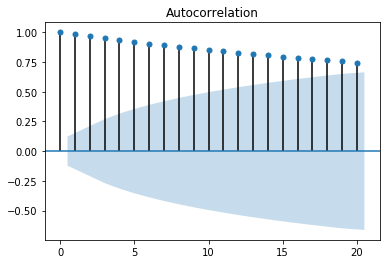

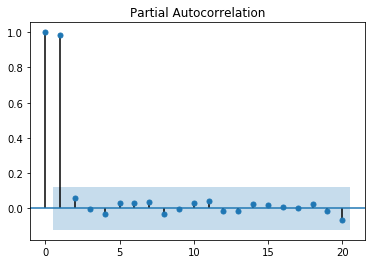

In [38]:
#understanding autocorrelation and partial auto correlations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(nift['Prices'],lags=20)
plt.show()
plot_pacf(nift['Prices'],lags = 20)
plt.show()

In [89]:

#first order differencing 
ts_diff = nift['Prices'] - nift['Prices'].shift()

#checking stationarity 
#stationarity(ts_diff.dropna())

In [90]:
ts_diff.dropna(inplace=True)

In [72]:
ts_diff

In [92]:
from statsmodels.tsa.stattools import adfuller
#dPrices <- dPrices.dropna(inplace=True)
#dfout =adfuller(nift['Prices'],autolag='AIC')

dfout =adfuller(ts_diff,autolag='AIC')
#dfoutput = pd.Series(dfout, index=['Test Statistic','P-Value', '#Lags used', '# of observations used'])
dfout
dfoutput = pd.Series(dfout[0:4], index=['Test Statistic','P-Value', '#Lags used', '# of observations used'])
dfoutput

Test Statistic           -1.272259e+01
P-Value                   9.754715e-24
#Lags used                0.000000e+00
# of observations used    2.530000e+02
dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
#dPrices <- dPrices.dropna(inplace=True)
dfout =adfuller(ni],autolag='AIC')
#dfoutput = pd.Series(dfout, index=['Test Statistic','P-Value', '#Lags used', '# of observations used'])
dfout
dfoutput = pd.Series(dfout[0:4], index=['Test Statistic','P-Value', '#Lags used', '# of observations used'])
dfoutput

In [99]:
#from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff,order=(2,2,0))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Prices   No. Observations:                  252
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1161.907
Method:                       css-mle   S.D. of innovations             24.283
Date:                Sun, 28 Jun 2020   AIC                           2331.814
Time:                        13:36:07   BIC                           2345.932
Sample:                             2   HQIC                          2337.495
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0723      0.643      0.112      0.910      -1.188       1.333
ar.L1.D2.Prices    -0.8716      0.055    -15.873      0.000      -0.979      -0.764
ar.L2.D2.Prices    -0.5148      0.055     -9.382      0.000      -0.622      -0.407
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8466           -1.1072j            1.3937           -0.3539
AR.2           -0.8466           +1.1072j            1.3937            0.3539
-----------------------------------------------------------------------------
"""

In [24]:
#! pip install pmdarima

^C


In [137]:
#from pmdarima.arima.utils import ARIMA, AutoARIMA, StepwiseContext, decompose
import pmdarima as pm

In [138]:

model1 = pm.auto_arima(train["Prices"], m=12)
                  

In [141]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  178
Model:             SARIMAX(0, 2, 1)x(0, 0, 1, 12)   Log Likelihood                -701.655
Date:                            Sun, 28 Jun 2020   AIC                           1411.310
Time:                                    12:14:34   BIC                           1423.992
Sample:                                         0   HQIC                          1416.454
                                            - 178                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0466      0.027      1.707      0.088      -0.007       0.100
ma.L1         -1.0000     10.780     -0.093      0.926     -22.128      20.128
ma.S.L12       0.0765      0.092      0.831      0.406      -0.104       0.257
sigma2       165.0948   1779.065      0.093      0.926   -3321.808    3651.997
===================================================================================
Ljung-Box (Q):                       37.50   Jarque-Bera (JB):                45.91
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
pred = pd.DataFrame(model1.predict(n_periods=20), index=test[0:20].index)
pred.columns = ['predicted_Price']
pred

,predicted_Price
Date,
16-Sep-03,1335.502451
17-Sep-03,1342.028139
18-Sep-03,1347.906169
19-Sep-03,1350.912333
22-Sep-03,1357.197242
23-Sep-03,1364.394373
24-Sep-03,1371.095683
25-Sep-03,1375.609576
26-Sep-03,1381.443315


In [147]:
pred['predicted_Price']

Date
16-Sep-03    1335.502451
17-Sep-03    1342.028139
18-Sep-03    1347.906169
19-Sep-03    1350.912333
22-Sep-03    1357.197242
23-Sep-03    1364.394373
24-Sep-03    1371.095683
25-Sep-03    1375.609576
26-Sep-03    1381.443315
29-Sep-03    1386.146079
30-Sep-03    1389.151750
1-Oct-03     1391.415507
3-Oct-03     1397.389392
6-Oct-03     1403.409851
7-Oct-03     1409.476883
8-Oct-03     1415.590489
9-Oct-03     1421.750668
10-Oct-03    1427.957421
13-Oct-03    1434.210747
14-Oct-03    1440.510647
Name: predicted_Price, dtype: float64

In [148]:
# Accuracy metrics
fc = list(fc)

#root mean sqaure error 
rmse = np.mean((pred['predicted_Price'] - test.Prices)**2)**.5  

#mean absolute error
mae = np.mean(np.abs(pred['predicted_Price'] - test.Prices)) 
mape = np.mean(np.abs(pred['predicted_Price']- test.Prices)/np.abs(test.Prices))  # MAPE
print('rmse:',rmse)
print('mae:',mae)
print('mape:',mape)

rmse: 55.46677773570635
mae: 45.542347351696336
mape: 0.031414497206989724


In [2]:
from sklearn.metrics import r2_score
test = pred['predicted_price']
r2_score(test['Prices'], test['predicted_Price'])

NameError: name 'pred' is not defined